# Hemoglobin

To construct the hemoglobin module, first we import  __masspy__ . 

In [1]:
import matplotlib.pyplot as plt

import sympy as sym

from mass import (
    io, MassMetabolite, MassReaction, MassModel, Simulation, plot_simulation, qcqa_model)

## Model Construction
The first step of creating the hemoglobin module is to define the MassModel object.

In [2]:
hemoglobin = MassModel("Hemoglobin")

### Metabolites

The next step is to define all of the metabolites in the hemoglobin using identifiers and the names found in the BiGG Database (http://bigg.ucsd.edu/). In order to ensure our module is physiologically accurate, it is important to provide the __formula__ keyword with a string representing the chemical formula for each metabolite, and the  __charge__ keyword with an integer representing the metabolite's ionic charge (Note that neutrally charged metabolites are provided with 0). To indicate that the cytosol is the cellular compartment in which glycolysis occurs, the string "c" is provided to the __compartment__ keyword. 

In this module of hemoglobin, there are 13 metabolites inside the cytosol compartment. Note that for metabolites without BiGG identifiers are given ones that are similar to BiGG style. 

In [3]:
# Hemoglobin and intermediates
hb_c = MassMetabolite(
    id="hb_c", 
    name="Hemoglobin", 
    formula="[Hb]",
    charge=0,
    compartment="c")
hb_1o2_c = MassMetabolite(
    id="hb_1o2_c", 
    name="Oxyhemoglobin (1)", 
    formula="[Hb]-O2",
    charge=0,
    compartment="c")
hb_2o2_c = MassMetabolite(
    id="hb_2o2_c", 
    name="Oxyhemoglobin (2)", 
    formula="[Hb]-O4",
    charge=0,
    compartment="c")
hb_3o2_c = MassMetabolite(
    id="hb_3o2_c", 
    name="Oxyhemoglobin (3)", 
    formula="[Hb]-O6",
    charge=0,
    compartment="c")
hb_4o2_c = MassMetabolite(
    id="hb_4o2_c", 
    name="Oxyhemoglobin (4)", 
    formula="[Hb]-O8",
    charge=0,
    compartment="c")
dhb_c = MassMetabolite(
    id="dhb_c", 
    name="Deoxyhemoglobin", 
    formula="[Hb]-C3H3O10P2",
    charge=-5,
    compartment="c")
_23dpg_c = MassMetabolite(
    id="_23dpg_c", 
    name="2,3-Disphospho-D-glycerate", 
    formula="C3H3O10P2",
    charge=-5,
    compartment="c")
_13dpg_c = MassMetabolite(
    id="_13dpg_c",
    name="3-Phospho-D-glyceroyl phosphate",
    formula="C3H4O10P2",
    charge=-4,
    compartment="c")
_3pg_c = MassMetabolite(
    id="_3pg_c",
    name="3-Phospho-D-glycerate",
    formula="C3H4O7P",
    charge=-3,
    compartment="c")

# Cofactors
o2_c = MassMetabolite(
    id="o2_c",
    name="Oxygen",
    formula="O2",
    charge=0,
    compartment="c")
h_c = MassMetabolite(
    id="h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c")
pi_c = MassMetabolite(
    id="pi_c",
    name="Phosphate",
    formula="HPO4",
    charge=-2,
    compartment="c")
h2o_c = MassMetabolite(
    id="h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c")

metabolite_list = [_23dpg_c, hb_c, hb_1o2_c, hb_2o2_c, 
                   hb_3o2_c, hb_4o2_c, dhb_c, _13dpg_c,
                   _3pg_c, o2_c, pi_c, h_c, h2o_c]

After generating the metabolites, all metabolites are added to the model.

In [4]:
hemoglobin.add_metabolites(metabolite_list)

### Reactions

Once all of the MassMetabolite objects have been created for each of the species in hemoglobin, the next step is to define all of the reactions that occur inside the cytosol compartment using BiGG idenfifiers and reaction names. To make this module useful for integration with other modules, it is important to provide the string "Hemoglobin" to the __subsystem__ keyword. By providing the subsystem, the reactions can be easily obtained even when integrated with a significantly larger module. 

Note that after the creation of each MassReaction object, the metabolites are added to the reaction using a dictionary where keys are the metabolites and values are the stoichiometric coefficients (reactants have negative coefficients, products have positive ones). 

In this module of hemoglobin, there are 7 reactions occuring.

In [5]:
DPGase = MassReaction(
    id="DPGase",
    name="Diphosphoglycerate phosphatase",
    subsystem="Hemoglobin", 
    reversible=False)
DPGase.add_metabolites({
    h2o_c: -1,
    _23dpg_c: -1,
    _3pg_c: 1,
    pi_c: 1})

DPGM = MassReaction(
    id="DPGM",
    name="Diphosphoglyceromutase",
    subsystem="Hemoglobin")
DPGM.add_metabolites({
    _13dpg_c: -1,
    _23dpg_c: 1,
    h_c: 1})

HBDPG = MassReaction(
    id="HBDPG",
    name="Hemoglobin-23dpg binding",
    subsystem="Hemoglobin")
HBDPG.add_metabolites({
    hb_c: -1,
    _23dpg_c: -1,
    dhb_c: 1})

HBO1 = MassReaction(
    id="HBO1",
    name="Oxygen Loading (1)",
    subsystem="Hemoglobin")
HBO1.add_metabolites({
    hb_c: -1,
    o2_c: -1,
    hb_1o2_c: 1})

HBO2 = MassReaction(
    id="HBO2",
    name="Oxygen Loading (2)",
    subsystem="Hemoglobin")
HBO2.add_metabolites({
    hb_1o2_c: -1,
    o2_c: -1,
    hb_2o2_c: 1})

HBO3 = MassReaction(
    id="HBO3",
    name="Oxygen Loading (3)",
    subsystem="Hemoglobin")
HBO3.add_metabolites({
    hb_2o2_c: -1,
    o2_c: -1,
    hb_3o2_c: 1})

HBO4 = MassReaction(
    id="HBO4",
    name="Oxygen Loading (4)",
    subsystem="Hemoglobin")
HBO4.add_metabolites({
    hb_3o2_c: -1,
    o2_c: -1,
    hb_4o2_c: 1})

reaction_list = [DPGase, DPGM, HBDPG, HBO1, HBO2, HBO3, HBO4]

After generating the reactions, all reactions are added to the glycolysis model. Adding the MassReaction objects will also add their associated MassMetabolite objects if they have not already been added to the model. 

In [6]:
hemoglobin.add_reactions(reaction_list)

### Exchange reactions

After generating the reactions, the next step is to add the exchange reactions and fix the concentrations of the external metabolites of the system. This can easily be done using the __MassModel.add_exchange__ method. With the generation of the exchange reactions, the character "e" is used to defined the "Extracellular" compartment. 

In this module of hemoglobin, there is 1 exchange reaction.

In [7]:
EX_o2_e = EX_pi_e = hemoglobin.add_exchange(o2_c, exchange_type="exchange", 
                                 external_concentration=0.0200788)
hemoglobin

Name,Hemoglobin
Memory address,0x011bb2ff60
Stoichiometric Matrix,13x8
Matrix Rank,8
Matrix Type,"dense, float64"
Number of Metabolites,13
Number of Reactions,8
Number of Initial Conditions,0
Number of Forward Rate Constants,0
Number of Equilibrium Constants,1
Number of Irreversible Reactions,1


### Computing the steady state concentrations. 

The binding of the two ligands, oxygen and DPG23, to hemoglobin is a rapid process. Since hemoglobin is confined to the RBC, we can use equilibrium assumptions for the binding reactions. 

1. The binding of oxygen is at equilibrium for each form of oxygenated hemoglobin.
2. The binding of DPG23 to hemoglobin is also at equilibrium 
3. The total mass of hemoglobin is a constant 

These six equations have six unknowns (the six forms of Hb) and need to be solved simultaneously as a function of the oxygen and DPG23 concentrations. The equilibrium relationships can be combined with the $\text{Hb}_{\mathrm{tot}}$ mass balance, and this equation is solved for  $\text{Hb}_{\mathrm{0}}$ for given oxygen and 23DPG concentrations. Then the steady state concentrations for all other forms of hemoglobin can be computed from the equilibrium relationships. 

To do this, the equilibrium constants are defined and then the equilibrium expressions are converted into __sympy.Equality__ objects for symbolic calculations. 

In [8]:
metabs = dict((m.id, sym.Symbol(m.id)) for m in hemoglobin.metabolites)

equations = dict()
# Iterate through reactions assumed to be at equilibrium
for rxn in [HBO1, HBO2, HBO3, HBO4, HBDPG]:
    reactants = "*".join([m.id for m in rxn.reactants])
    products = "*".join([m.id for m in rxn.products])
    # Find the hemoglobin form being made as a product (bound to most oxygen)
    hem_prod = [sym.Symbol(m.id) 
                for m in rxn.products 
                if m not in [_23dpg_c, hb_c, o2_c]].pop()
    # Set up the equation and solve it for the desired form hemoglobin 
    equation = sym.Eq(sym.Symbol(rxn.Keq_str), sym.sympify("({0}) / ({1})".format(products, reactants), 
                                         locals=metabs))
    equation = list(sym.solveset(equation, hem_prod)).pop()
    # Update equation dictionary with the equation for the bound form of hemoglobin
    # These equations will be dependent on hb_c, o2_c, and _23dpg_c
    equations.update({hem_prod: equation.subs(equations)})
# Specify an equation for the total amount of hemoglobin
Hb_tot = sym.Eq(sym.Symbol("Hb-Total"), 
                  sym.sympify("+".join([m.id for m in hemoglobin.metabolites 
                                       if "hb" in m.id]), locals=metabs))
# Substitute in equations for each bound form to have total hemoglobin as a function of 
# Oxygen concentration, free hemoglobin, and 23dpg.
Hb_tot = Hb_tot.subs(equations)
sym.pprint(Hb_tot)

                                                                              
Hb-Total = Keq_HBDPG⋅_23dpg_c⋅hb_c + Keq_HBO1⋅Keq_HBO2⋅Keq_HBO3⋅Keq_HBO4⋅hb_c⋅

     4                                        3                               
o_2_c  + Keq_HBO1⋅Keq_HBO2⋅Keq_HBO3⋅hb_c⋅o_2_c  + Keq_HBO1⋅Keq_HBO2⋅hb_c⋅o_2_c

2                             
  + Keq_HBO1⋅hb_c⋅o_2_c + hb_c


At this point, the numerical values for the equilibrium constant and the total concetration of hemoglobin are specified. The total amount of hemoglobin is a constant, at circa 7.3 mM. These values are substituted into the current equations. 

In [9]:
numerical_values = {sym.Symbol("Hb-Total"): 7.3}
DPGM.Keq = 2.3*1e6
HBO1.Keq = 41.8352
HBO2.Keq = 73.2115
HBO3.Keq = 177.799 
HBO4.Keq = 1289.92 
HBDPG.Keq = 1/4
EX_o2_e.Keq = 1

numerical_values.update(dict((sym.Symbol(Keq), value) 
                             for Keq, value in hemoglobin.parameters["Keq"].items()))

equations.update(dict((hem_form, equation.subs(numerical_values)) 
                      for hem_form, equation in equations.items()))
Hb_tot = Hb_tot.subs(numerical_values)
sym.pprint(Hb_tot)

                                                     4                        
7.3 = 0.25⋅_23dpg_c⋅hb_c + 702446487.27335⋅hb_c⋅o_2_c  + 544565.932207695⋅hb_c

      3                          2                            
⋅o_2_c  + 3062.8177448⋅hb_c⋅o_2_c  + 41.8352⋅hb_c⋅o_2_c + hb_c


To find the steady state, we have to specify the numerical values of the variables that characterize the network environment. The flux through the Rapoport-Luebering shunt is typically about 0.44 mM/hr (Schrader 1993).  The steady state concentration of 23DPG is typically about 3.1 mM (Mehta 2005). The concentration of oxygen that we chose to solve for the steady state is 70 mmHg, that is mid way between 100 mmHg in the lung, and 40 mmHg in tissue. Using these numbers, the computed steady state concentrations are obtained, as: 

In [10]:
# Define known concentrations
concentrations = {metabs["_23dpg_c"]: 3.1, 
                  metabs["o2_c"]: 70*2.8684*1e-4}
# Convert the solution set into a list, pop the solution out of the set, 
# and convert it into a numerical value
hb_conc = list(sym.solveset(Hb_tot.subs(concentrations), sym.Symbol("hb_c"))).pop()
concentrations.update({metabs["hb_c"] :hb_conc})
# Solve for the rest of the hemoglobin concentrations
for hb_form, equation in equations.items():
    equation = equation.subs(concentrations)
    concentrations.update({hb_form: equation})
concentrations

{_23dpg_c: 3.1,
 o2_c: 0.0200788,
 hb_c: 0.0596253007092338,
 hb_1o2_c: 0.0500852891913810,
 hb_2o2_c: 0.0736253283416870,
 hb_3o2_c: 0.262841727245073,
 hb_4o2_c: 6.80761274646297,
 dhb_c: 0.0462096080496562}

Once the steady state concentrations have been determined, the hemoglobin module can be updated. The remaining concentrations are obtained from the experimental data used to generate the glycolysis module. 

In [11]:
for metab_sym, value_sym in concentrations.items():
    metab = hemoglobin.metabolites.get_by_id(str(metab_sym))
    metab.ic = float(value_sym)
    
_13dpg_c.ic = 0.000243
_3pg_c.ic = 0.0773
pi_c.ic = 2.5
h_c.ic = 0.0000899757
h2o_c.ic = 1.0

hemoglobin.set_initial_conditions()
for metab, ic in hemoglobin.initial_conditions.items():
    print("%s: %.6f" % (metab.id, ic))

_23dpg_c: 3.100000
hb_c: 0.059625
hb_1o2_c: 0.050085
hb_2o2_c: 0.073625
hb_3o2_c: 0.262842
hb_4o2_c: 6.807613
dhb_c: 0.046210
_13dpg_c: 0.000243
_3pg_c: 0.077300
o2_c: 0.020079
pi_c: 2.500000
h_c: 0.000090
h2o_c: 1.000000


With the steady state concentrations and steady state flux values, the PERCs can be calculated. For this module, the PERCs for the binding of hemoglobin to oxygen will be set manually to better reflect the physiology.

Note: Reactions at equilibrium have a steady state flux of 0. 

In [12]:
DPGM.v = 0.441
DPGase.v = 0.441
HBO1.v = 0
HBO2.v = 0
HBO3.v = 0
HBO4.v = 0
HBDPG.v = 0
EX_o2_e.v = 0

hemoglobin.calculate_PERCs(update_reactions=True);
EX_o2_e.kf = 509726
HBDPG.kf =519613
HBO1.kf = 506935
HBO2.kf = 511077
HBO3.kf = 509243
HBO4.kf = 501595

## QC/QA Model

Before saving the module, it is important to ensure that the module is elementally balanced, and that the module can be integrated into a larger network for simulation. Therefore, the __qcqa_model__ method is used to provide a report on the module quality and indicate whether simulation is possible and if not, what parameters and/or initial conditions are missing. 

In [13]:
qcqa_model(hemoglobin,  parameters=True, concentrations=True, 
           fluxes=True, superfluous=True, elemental=True)

╒═══════════════════════════════╕
│ MODEL ID: Hemoglobin          │
│ SIMULATABLE: True;            │
│ NUMERICAL CONSISTENCY: True   │
╞═══════════════════════════════╡
╘═══════════════════════════════╛


### Optional: Ordering of internal species and reactions

Sometimes, it is also desirable to reorder the metabolite and reaction objects inside the module to follow the physiology. To reorder the internal species, one can use the method __cobra.DictList.get_by_any__ method with the list of metabolite identifiers in the desirable order. To ensure all metabolites are still present and not forgotten in the module, a QC/QA check is also performed. 

In [14]:
from cobra import DictList

In [15]:
new_metabolite_order = ["_23dpg_c", "hb_c", "hb_1o2_c", "hb_2o2_c", 
                        "hb_3o2_c", "hb_4o2_c", "dhb_c", "_13dpg_c",
                        "_3pg_c",  "o2_c", "pi_c", "h_c", "h2o_c"]

if len(hemoglobin.metabolites) == len(new_metabolite_order):
    hemoglobin.metabolites = DictList(hemoglobin.metabolites.get_by_any(new_metabolite_order))
    
new_reaction_order = ["DPGM", "DPGase", "HBO1", "HBO2", 
                      "HBO3", "HBO4", "HBDPG", "EX_o2_e"]

if len(hemoglobin.reactions) == len(new_reaction_order):
    hemoglobin.reactions = DictList(hemoglobin.reactions.get_by_any(new_reaction_order))
    
hemoglobin.update_S(matrix_type="DataFrame")

,DPGM,DPGase,HBO1,HBO2,HBO3,HBO4,HBDPG,EX_o2_e
_23dpg_c,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
hb_c,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0
hb_1o2_c,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0
hb_2o2_c,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0
hb_3o2_c,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
hb_4o2_c,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
dhb_c,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
_13dpg_c,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_3pg_c,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
o2_c,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0


## Steady State and and Model Validation 

In order to determine whether the module can be successfully integrated into a model, another model can be loaded, merged with the module, and simulated. To validate this module, it will be merged with a __glycolysis__ model. 

To find the steady state of the model, the __Simulation.find_steady_state_model__ method can be used and will update the values in the Simulation object with the steady state values if \\(\textbf{update_initial_conditions}\\) and \\(\textbf{update_reactions}\\) arguments are set to True. 
To validate the steady state of the model, concentration and flux solutions can be plotted using the __plot_simulation__ function.

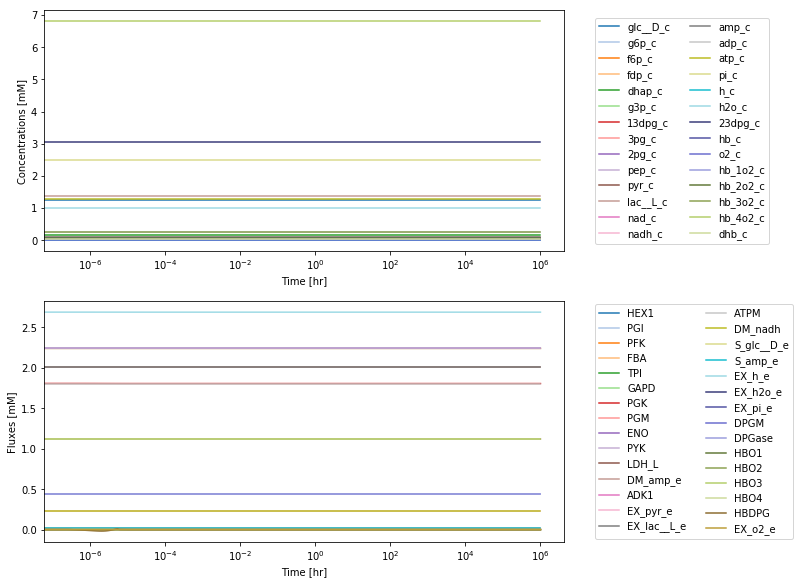

In [16]:
glycolysis = io.json.load_json_model("../../models/json-models/glycolysis.json")
glyc_hb = glycolysis.merge(hemoglobin, new_model_id="GlycHB")

# Setup simulation object, ensure model is at steady state
sim = Simulation(glyc_hb)
sim.find_steady_state_model(model=glyc_hb, strategy="simulate", 
                            update_initial_conditions=True, 
                            update_reactions=True)

t0, tf = (0, 1e6)
conc_sol, flux_sol = sim.simulate_model(glyc_hb, time=(t0, tf))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 8), constrained_layout=True);

plot_simulation(conc_sol, ax=ax1, legend="right outside",
                plot_function="semilogx", xlabel="Time [hr]",
                ylabel="Concentrations [mM]");

plot_simulation(flux_sol, ax=ax2, legend="right outside",
                plot_function="semilogx", xlabel="Time [hr]",
                ylabel="Fluxes [mM]");

### Optional Information: Storing references
#### Compartment
Because the character "c" represents the cytosol compartment, it is recommended to define and set the compartment in the __MassModel.compartments__ attribute.

In [17]:
hemoglobin.compartments = {"c": "Cytosol"}
print(hemoglobin.compartments)

{'c': 'Cytosol'}


#### Units
All of the units for the numerical values used in this model are "Millimoles" for amount, "Liters" for volume, and "Hours" for time. In order to ensure that future users understand the numerical values for model, it is important to define the __MassModel.units__ attribute. Like the __compartment__ attribute, the __units__ attribute is a dictionary and can easily be updated using the same methods.

Note that this attribute will NOT track units, but instead acts as a reference for the user and others so that they can perform necessary unit conversions.

In [18]:
hemoglobin.units = {'N': 'Millimoles', 'Vol': 'Liters', 'Time': 'Hours'}
hemoglobin.units

{'N': 'Millimoles', 'Vol': 'Liters', 'Time': 'Hours'}

#### Literature

Because specific sources of literature were used in the building of this module, it is important for others who wish to use this module to be able to access those same literature sources. In general, to preserve information for users, either the __notes__ attribute or the __annotation__ attribute can be used. In this case, the literature source is placed in __notes__. 

In [19]:
hemoglobin.notes.update({"Literature": 
    ["M.C. Schrader, C.J. Eskey, V. Simplaceanu, and C. Ho. A carbon-13 nu- clear magnetic resonance investigation of the metabolic fluxes associated with glucose metabolism in human erythrocytes. Biochim Biophys Acta., 1182(2):162–178, 1993.",
     "M. Mehta, M. Haripalsingh, and S.S. Sonawat. Malaria parasite-infected erythrocytes inhibit glucose utilization in uninfected red cells. FEBS Let- ters, 579(27):6151–6158, 2005"]})
hemoglobin.notes

{'Literature': ['M.C. Schrader, C.J. Eskey, V. Simplaceanu, and C. Ho. A carbon-13 nu- clear magnetic resonance investigation of the metabolic fluxes associated with glucose metabolism in human erythrocytes. Biochim Biophys Acta., 1182(2):162–178, 1993.',
  'M. Mehta, M. Haripalsingh, and S.S. Sonawat. Malaria parasite-infected erythrocytes inhibit glucose utilization in uninfected red cells. FEBS Let- ters, 579(27):6151–6158, 2005']}

## Export

After validation, the model is ready to be saved. The model can either be exported as a ".json" file or if the model conforms to SBML standards, as a ".xml" file using the classes in __mass.io__. To export the model, only the path to the directory and the name of the model need to be specified. Both are shown. 

### Export using JSON

In [20]:
io.json.save_json_model(hemoglobin, "../../models/json-models/hemoglobin.json")

### Export using SBML

In [21]:
# io.sbml.write_sbml_model(hemoglobin, "../../models/sbml-models/hemoglobin.xml")